In [20]:
datos=spark.read.csv("titanic.csv",header=True,inferSchema=True)

In [21]:
datos.printSchema(),datos.show(2)

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)

+-----------+--------+------+--------------------+------+----+-----+-----+---------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|   Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+---------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0| PC 17599|71.2833|  C85|       

(None, None)

In [22]:
datos.select("Pclass").distinct().show()

+------+
|Pclass|
+------+
|     1|
|     3|
|     2|
+------+



In [23]:
datos.groupBy("Pclass").count().show()

+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+



In [24]:
datos.where("Pclass==3").groupBy("Survived").count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  119|
|       0|  372|
+--------+-----+



In [25]:
datos.crosstab("Survived","Pclass").show()

+---------------+---+---+---+
|Survived_Pclass|  1|  2|  3|
+---------------+---+---+---+
|              1|136| 87|119|
|              0| 80| 97|372|
+---------------+---+---+---+



In [26]:
datos.crosstab("Pclass","Embarked").show()

+---------------+---+---+---+----+
|Pclass_Embarked|  C|  Q|  S|null|
+---------------+---+---+---+----+
|              2| 17|  3|164|   0|
|              1| 85|  2|127|   2|
|              3| 66| 72|353|   0|
+---------------+---+---+---+----+



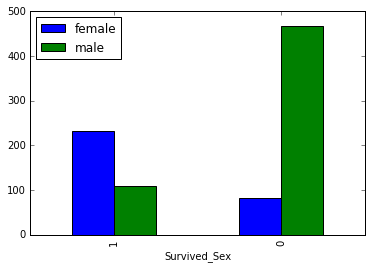

In [27]:
datos.crosstab("Survived","Sex").toPandas().plot.bar(x="Survived_Sex")

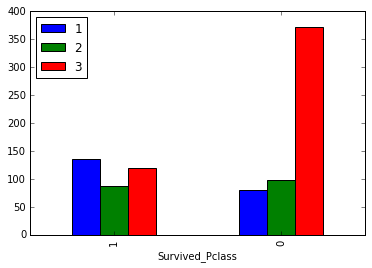

In [28]:
x=datos.crosstab("Survived","Pclass").toPandas().plot.bar(x="Survived_Pclass")

In [29]:
datos.count(),datos.na.drop().count()

(891, 183)

In [30]:
datosNull=datos.subtract(datos.na.drop())

In [31]:
datosNull.show(vertical=True)

-RECORD 0---------------------------
 PassengerId | 14                   
 Survived    | 0                    
 Pclass      | 3                    
 Name        | Andersson, Mr. An... 
 Sex         | male                 
 Age         | 39.0                 
 SibSp       | 1                    
 Parch       | 5                    
 Ticket      | 347082               
 Fare        | 31.275               
 Cabin       | null                 
 Embarked    | S                    
-RECORD 1---------------------------
 PassengerId | 166                  
 Survived    | 1                    
 Pclass      | 3                    
 Name        | "Goldsmith, Maste... 
 Sex         | male                 
 Age         | 9.0                  
 SibSp       | 0                    
 Parch       | 2                    
 Ticket      | 363291               
 Fare        | 20.525               
 Cabin       | null                 
 Embarked    | S                    
-RECORD 2---------------------------
 

In [32]:
datos.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [33]:
datosFinales=datos.drop("PassengerId","Ticket","Name","Cabin").na.drop()
datosFinales.count(),datosFinales.na.drop().count()

(712, 712)

In [34]:
datosFinales.show()

+--------+------+------+----+-----+-----+-------+--------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+--------+------+------+----+-----+-----+-------+--------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|
|       1|     1|female|38.0|    1|    0|71.2833|       C|
|       1|     3|female|26.0|    0|    0|  7.925|       S|
|       1|     1|female|35.0|    1|    0|   53.1|       S|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|
|       0|     1|  male|54.0|    0|    0|51.8625|       S|
|       0|     3|  male| 2.0|    3|    1| 21.075|       S|
|       1|     3|female|27.0|    0|    2|11.1333|       S|
|       1|     2|female|14.0|    1|    0|30.0708|       C|
|       1|     3|female| 4.0|    1|    1|   16.7|       S|
|       1|     1|female|58.0|    0|    0|  26.55|       S|
|       0|     3|  male|20.0|    0|    0|   8.05|       S|
|       0|     3|  male|39.0|    1|    5| 31.275|       S|
|       0|     3|female|14.0|    0|    0| 7.8542|       

In [35]:
datosFinales.columns

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [36]:
from pyspark.ml.feature import (VectorAssembler,StringIndexer,
                                OneHotEncoderEstimator)

In [37]:
### aquí se convertiran las columnas tipo string en números/vectores###

In [38]:
indexadorS=StringIndexer(inputCol="Sex",outputCol="iSex")
datosI=indexadorS.fit(datosFinales).transform(datosFinales)
indexadorE=StringIndexer(inputCol="Embarked",outputCol="iEmbarked")
datosI2=indexadorE.fit(datosI).transform(datosI)
vectorizador=OneHotEncoderEstimator(inputCols=["iSex","iEmbarked"],
            outputCols=["vSex","vEmbarked"])
datosV=vectorizador.fit(datosI2).transform(datosI2)
#datosV.select("Sex","vSex","Embarked","vEmbarked").show(5)

In [39]:
constructor=VectorAssembler(inputCols=['Pclass', 'Age', 'SibSp',
        'Parch', 'Fare',"vSex","vEmbarked"],outputCol="features")

In [40]:
datosF=constructor.transform(datosV)

In [41]:
datosF.show()

+--------+------+------+----+-----+-----+-------+--------+----+---------+-------------+-------------+--------------------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|iSex|iEmbarked|         vSex|    vEmbarked|            features|
+--------+------+------+----+-----+-----+-------+--------+----+---------+-------------+-------------+--------------------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S| 0.0|      0.0|(1,[0],[1.0])|(2,[0],[1.0])|[3.0,22.0,1.0,0.0...|
|       1|     1|female|38.0|    1|    0|71.2833|       C| 1.0|      1.0|    (1,[],[])|(2,[1],[1.0])|[1.0,38.0,1.0,0.0...|
|       1|     3|female|26.0|    0|    0|  7.925|       S| 1.0|      0.0|    (1,[],[])|(2,[0],[1.0])|(8,[0,1,4,6],[3.0...|
|       1|     1|female|35.0|    1|    0|   53.1|       S| 1.0|      0.0|    (1,[],[])|(2,[0],[1.0])|[1.0,35.0,1.0,0.0...|
|       0|     3|  male|35.0|    0|    0|   8.05|       S| 0.0|      0.0|(1,[0],[1.0])|(2,[0],[1.0])|[3.0,35.0,0.0,0.0...|
|       0|     1

In [42]:
entrena,evalua=datosF.randomSplit([0.7,0.3])

In [43]:
from pyspark.ml.classification import LogisticRegression

In [44]:
lr=LogisticRegression(labelCol="Survived")

In [45]:
modelo=lr.fit(entrena)

In [46]:
modelo.summary.areaUnderROC

0.8726366800900962

In [47]:
evaluacion=modelo.evaluate(evalua)

In [48]:
evaluacion.areaUnderROC

0.8280869565217392

In [52]:
evaluacion.predictions.select("Survived","prediction").show(500)

+--------+----------+
|Survived|prediction|
+--------+----------+
|       0|       1.0|
|       0|       1.0|
|       0|       1.0|
|       0|       1.0|
|       0|       1.0|
|       0|       1.0|
|       0|       0.0|
|       0|       1.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       1.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       1.0|
|       0|       1.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|